# 22DS46_Syed Md. Afraim

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import tools
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
from plotly import tools
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

##  Step 1: Reading the data

In [4]:
# Read the application_data.csv and previous_application file
app= pd.read_csv('data/application_data.csv')

In [5]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##  Step 2: Inspecting the data

In [6]:
# Inspecting the shape of applications & prev_app
app.shape


(307511, 122)

In [7]:
# Column wise info
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
#describing the whole dataset
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
# Finding the % missing values in applications data
#calculating the percentage
missing = (app.isnull().mean()*100).round(2)
#printing out through loop
for col, perc in missing.items():
    print(f"{col} : {perc}")

SK_ID_CURR : 0.0
TARGET : 0.0
NAME_CONTRACT_TYPE : 0.0
CODE_GENDER : 0.0
FLAG_OWN_CAR : 0.0
FLAG_OWN_REALTY : 0.0
CNT_CHILDREN : 0.0
AMT_INCOME_TOTAL : 0.0
AMT_CREDIT : 0.0
AMT_ANNUITY : 0.0
AMT_GOODS_PRICE : 0.09
NAME_TYPE_SUITE : 0.42
NAME_INCOME_TYPE : 0.0
NAME_EDUCATION_TYPE : 0.0
NAME_FAMILY_STATUS : 0.0
NAME_HOUSING_TYPE : 0.0
REGION_POPULATION_RELATIVE : 0.0
DAYS_BIRTH : 0.0
DAYS_EMPLOYED : 0.0
DAYS_REGISTRATION : 0.0
DAYS_ID_PUBLISH : 0.0
OWN_CAR_AGE : 65.99
FLAG_MOBIL : 0.0
FLAG_EMP_PHONE : 0.0
FLAG_WORK_PHONE : 0.0
FLAG_CONT_MOBILE : 0.0
FLAG_PHONE : 0.0
FLAG_EMAIL : 0.0
OCCUPATION_TYPE : 31.35
CNT_FAM_MEMBERS : 0.0
REGION_RATING_CLIENT : 0.0
REGION_RATING_CLIENT_W_CITY : 0.0
WEEKDAY_APPR_PROCESS_START : 0.0
HOUR_APPR_PROCESS_START : 0.0
REG_REGION_NOT_LIVE_REGION : 0.0
REG_REGION_NOT_WORK_REGION : 0.0
LIVE_REGION_NOT_WORK_REGION : 0.0
REG_CITY_NOT_LIVE_CITY : 0.0
REG_CITY_NOT_WORK_CITY : 0.0
LIVE_CITY_NOT_WORK_CITY : 0.0
ORGANIZATION_TYPE : 0.0
EXT_SOURCE_1 : 56.38
EXT_SOURC

In [10]:
# finding the list of columns having >40% missing values
#making a list
percG40 = []
#printing
for col, perc in missing.items():
    if perc > 40:
        percG40.append(col)
print(percG40)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [11]:
# Removing the columns having greater than 40% missing values and check the shape
dropped = app.drop(columns = percG40)
dropped.shape

(307511, 73)

In [12]:
# Checking the number of the columns having missing values post droping the columns having >40% missing values
dropped_col = (dropped.isnull().mean()*100).round(6)
for col, perc in dropped_col.items():
    #not printing the non missing values
    if perc!=0:
        #printing the desired 
        print(f'{col} : {perc}')

AMT_ANNUITY : 0.003902
AMT_GOODS_PRICE : 0.090403
NAME_TYPE_SUITE : 0.420148
OCCUPATION_TYPE : 31.345545
CNT_FAM_MEMBERS : 0.00065
EXT_SOURCE_2 : 0.214626
EXT_SOURCE_3 : 19.825307
OBS_30_CNT_SOCIAL_CIRCLE : 0.332021
DEF_30_CNT_SOCIAL_CIRCLE : 0.332021
OBS_60_CNT_SOCIAL_CIRCLE : 0.332021
DEF_60_CNT_SOCIAL_CIRCLE : 0.332021
DAYS_LAST_PHONE_CHANGE : 0.000325
AMT_REQ_CREDIT_BUREAU_HOUR : 13.501631
AMT_REQ_CREDIT_BUREAU_DAY : 13.501631
AMT_REQ_CREDIT_BUREAU_WEEK : 13.501631
AMT_REQ_CREDIT_BUREAU_MON : 13.501631
AMT_REQ_CREDIT_BUREAU_QRT : 13.501631
AMT_REQ_CREDIT_BUREAU_YEAR : 13.501631


##  Step 3: Impute missing values and check datatypes

**Step 3.1 Correcting the columns having greater than >10% missing values**

In [13]:
# Checking the mean of income of the missing values in occupation
mean_income_missing_occupation = app[app['OCCUPATION_TYPE'].isnull()]['AMT_INCOME_TOTAL'].mean()

print('Mean income for rows with missing occupation_type:', mean_income_missing_occupation)

Mean income for rows with missing occupation_type: 153516.03175239387


In [14]:
# Checking the value_counts for Occupation Type 
dropped['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [15]:
# Finding the mean income for each Occupation type
mean_inc = pd.DataFrame(app.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean())
mean_inc

,AMT_INCOME_TOTAL
OCCUPATION_TYPE,
Accountants,194578.357842
Cleaning staff,130790.895551
Cooking staff,138396.508176
Core staff,172656.695254
Drivers,187011.606413
HR staff,188916.282416
High skill tech staff,182842.045683
IT staff,213465.601711
Laborers,166357.482525


**Insight/Observation**

We can impute the missing values within Occupation Type with 'Sales staff' as the mean of annual income for the missing values (153.5K) is very close to (152.302K). Moreover the frequency of the Sales Staff is decent in the given data (32.2K) 

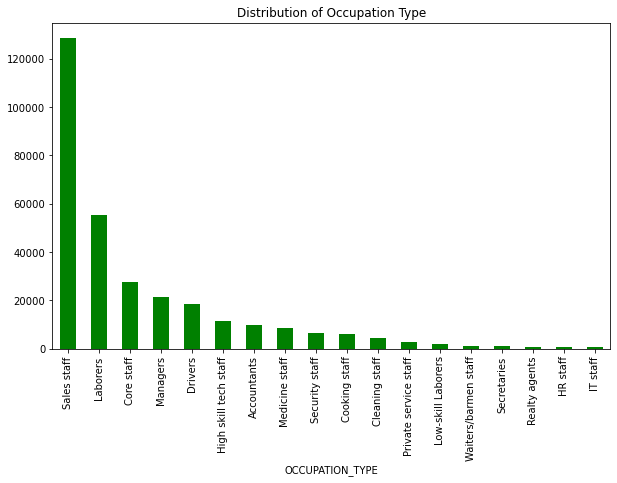

In [16]:

# Imputing missing values in Occupation Type with 'Sales Staff'
app['OCCUPATION_TYPE'].fillna('Sales staff', inplace=True)

# Creating a bar graph to visualize the updated counts of Occupation Type
occupation_counts = app['OCCUPATION_TYPE'].value_counts()
occupation_counts.plot(kind='bar', color = 'g', figsize=(10, 6))
plt.title('Distribution of Occupation Type')
plt.show()

**Removing irrelevant columns based on business knowledge**

The following columns can be dropped as they don't really hold much importance in identifying the whether the applicant will default or not even though they may show some co-relation with the target variable:

'NAME_TYPE_SUITE' - The person accompanying the applicant may have very little bearing. The intentional defaulters may bring someone along to look promising candidate or may come alone 

'REGION_POPULATION_RELATIVE' - Population in the region in which the applicant lives would not have any bearing on the applicant

'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE''FLAG_PHONE','FLAG_EMAIL'- Providing contact information of work or home might depend on the applicant's occupation and have very small bearing on defaulting the loan

'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START' -  The day or hour in which the application is filed would have very little bearing - could be useful if we can connect it with any particular offer offered by the bank

'EXT_SOURCE_2', 'EXT_SOURCE_3' - The background of how this score has been calulated and how its measure helps in identifying a defaulter is unknown

In [17]:
# Dropping irrelevant columns from 'dropped' dataframe which had less than 40% of missing values
cols_1 = ['NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','FLAG_MOBIL','FLAG_EMAIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_EMAIL','EXT_SOURCE_2', 'EXT_SOURCE_3']
dropped.drop(cols_1, axis = 1, inplace = True)

# Check the shape of the dataset

dropped.shape

(307511, 63)

**Step 3.2 Checking errors in data types if any**

In [18]:
# Beginning with columns containing Days

dropped[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


**Insight/Observation**

The days cannot be negative thus imputing them with absolute values

In [19]:
# Imputing the above days data with absolute values

# Calculating the absolute values of the columns first
abs_values = dropped[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].abs()


In [20]:
# Checking after imputation
stats = abs_values.describe()
stats

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373
std,4363.988632,139443.751806,3522.886321,1509.450419
min,7489.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000
max,25229.000000,365243.000000,24672.000000,7197.000000


In [21]:
# Checking unique values in the categorical variables
cat_var = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 
            'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']

for i in cat_var:
    print("%s \n"%dropped[i].value_counts())

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64 

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64 

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64 

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64 

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64 

NAME_HOUSING_TYPE
House / apartment      2728

**Insight/Observation**

'CODE_GENDER' - has unidentified category (XNA) - As they are just four fields we can impute it with F(has maximum frequency) for our analysis
'ORGANIZATION_TYPE' - has unidentified category (XNA) - Lets check what is the occupation type for this category

In [22]:
# Replacing XNA value with F
dropped['CODE_GENDER']=dropped['CODE_GENDER'].replace('XNA','F')
dropped['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [23]:
# Checking the occupation type for the 'XNA' Organization type
#firstly assigning a variable where I should find the XNA
xna_find = dropped[dropped['ORGANIZATION_TYPE']== 'XNA']['OCCUPATION_TYPE']
xna_find.value_counts()

OCCUPATION_TYPE
Cleaning staff    2
Name: count, dtype: int64

In [24]:
# Checking the organization type for Sales Staff

salE_find = dropped[dropped['OCCUPATION_TYPE']== 'Sales staff']['ORGANIZATION_TYPE']
salE_find.value_counts(normalize = True)

ORGANIZATION_TYPE
Self-employed             0.410847
Business Entity Type 3    0.275777
Trade: type 7             0.126223
Trade: type 3             0.045013
Other                     0.028752
Trade: type 2             0.020809
Business Entity Type 1    0.012523
Business Entity Type 2    0.010529
Industry: type 3          0.009688
Government                0.008753
Transport: type 4         0.007227
Construction              0.005638
Trade: type 1             0.004860
Industry: type 4          0.003115
Services                  0.002928
Agriculture               0.002586
Medicine                  0.002586
Restaurant                0.002554
Bank                      0.001807
Industry: type 11         0.001620
Mobile                    0.001464
Housing                   0.001339
Insurance                 0.001215
Advertising               0.001121
Industry: type 9          0.000935
Trade: type 6             0.000716
Realtor                   0.000716
Trade: type 4             0.000623
In

**Insight/Observation**
Although 14% Sales Staff belong to Business Entity Type 3, but these Sales Staff could be part of other organization as well. As we cannot conclude to which category these people belong to, we can impute XNA with Null values

In [25]:
# Replace the XNA with null values
dropped['ORGANIZATION_TYPE'].replace('XNA', np.nan, inplace =True)


**Step 3.3 Checking the dtypes**

In [26]:
dropped.dtypes.value_counts()

int64      36
float64    17
object     10
Name: count, dtype: int64

In [27]:
dropped.select_dtypes('object').columns 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

In [28]:
dropped.select_dtypes('float').columns 

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [29]:
dropped.select_dtypes('int').columns 

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

**Insight/Observation**

Variables involving days or enquiries can be converted to integers and some flags which are int can be converted to categorical variable 

In [30]:
flags = ['FLAG_CONT_MOBILE', 'FLAG_PHONE', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# Function to convert columns
def convert(dropped, cols):
    replacements = {0: 'N', 1: 'Y'}
    for col in cols:
        dropped[col].replace(replacements, inplace=True)
    return dropped

# Calling the function for the DataFrame 'dropped'
called = convert(dropped, flags)
called.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,N,N,N,N,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,N,N,N,N,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Converting the variables having days & enquiries from float to int

days = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

for i in days:
    dropped[i] = dropped[i].astype(int)
    
#seeing the data types
dropped.dtypes.value_counts()
    


object     38
float64    16
int64       5
int32       4
Name: count, dtype: int64

**Step 3.4 Binning the continuous variables and transforming variables**

Before...

In [38]:
dropped['AMT_INCOME_TOTAL'].head(10)

0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
5     99000.0
6    171000.0
7    360000.0
8    112500.0
9    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

After...

In [35]:
# Binning 'AMT_INCOME_TIER' based on quantiles
# Create a new column 'AMT_INCOME_TIER' by binning the 'AMT_INCOME_TOTAL' column
dropped['AMT_INCOME_TIER'] = pd.qcut(dropped['AMT_INCOME_TOTAL'],q= [0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
dropped['AMT_INCOME_TIER'].head(10)

0       MEDIUM
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5     VERY_LOW
6       MEDIUM
7    VERY_HIGH
8          LOW
9          LOW
Name: AMT_INCOME_TIER, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [42]:
# Binning 'AMT_INCOME_TIER' based on quantiles
dropped['AMT_CREDIT_TIER'] = pd.qcut(dropped.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
dropped.groupby('AMT_INCOME_TIER').agg({'AMT_INCOME_TOTAL':'mean'})

,AMT_INCOME_TOTAL
AMT_INCOME_TIER,
VERY_LOW,78064.972119
LOW,123980.231101
MEDIUM,186525.966696
HIGH,279394.540475
VERY_HIGH,472707.808493


In [58]:
#for understanding..
print(f'BEFORE..\n')
before = dropped['DAYS_BIRTH'].iloc[37:39].abs()
print(f'{before}\nAFTER...')

dropped['AGE'] = (dropped['DAYS_BIRTH']/365).astype(int)
dropped['AGE'].iloc[37:39].abs()

37    21077
38    23920
Name: DAYS_BIRTH, dtype: int32
AFTER...


37    57
38    65
Name: AGE, dtype: int32

In [63]:
#65years = 23920 days approx.
# Converting the days_birth to years in order to determine the age in years
dropped['AGE'] = (dropped['DAYS_BIRTH']/365).astype(int).abs()
dropped['AGE'].value_counts()

AGE
38    8873
37    8799
39    8770
40    8624
36    8614
27    8476
41    8449
31    8377
43    8308
42    8216
28    7975
32    7911
44    7819
30    7806
35    7804
33    7714
29    7670
34    7631
54    7551
53    7457
46    7293
45    7205
47    7018
48    6984
56    6828
57    6768
52    6763
51    6689
55    6637
59    6631
49    6627
50    6482
58    6268
60    6227
62    5514
61    5418
63    5197
64    5117
26    4561
25    4168
23    4057
24    3905
65    3113
22    2933
66    2085
67    2042
21    1254
68     866
69      16
20       1
Name: count, dtype: int64

In [64]:
# Binning 'AGE' based on years
dropped['AGE_GROUPS'] = pd.cut(dropped.AGE, bins=[19,25,35,60,70], labels=['VERY_YOUNG', 'YOUNG', "MID_AGE", 'SENIOR_CITIZENS'])
dropped.groupby('AGE_GROUPS').agg({'AGE':'mean'})

,AGE
AGE_GROUPS,
VERY_YOUNG,23.416534
YOUNG,30.653184
MID_AGE,47.248833
SENIOR_CITIZENS,63.471329


### Step 4 Checking Outliers 

In [65]:
dropped.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,-4986.120327,...,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.435968
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,3522.886321,...,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.954593
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,...,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,...,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000


**Insights/Observations**

There are some variables which have significantly high max or low min values compared to their mean. We will be ploting box plot to see the distributions

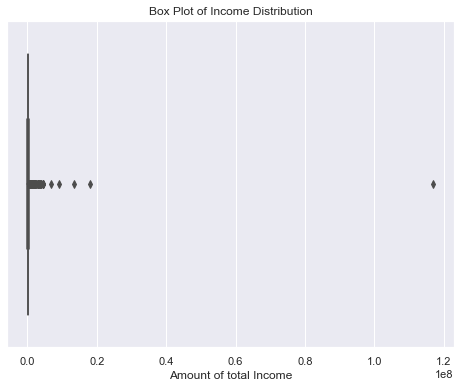

In [79]:
# Ploting box plot for AMT_INCOME_TOTAL
import seaborn as sns
sns.set(style="darkgrid")  

# Create a box plot for 'AMT_INCOME_TOTAL'
plt.figure(figsize=(8, 6))  
sns.boxplot(data =dropped, x=dropped['AMT_INCOME_TOTAL'])

# Add labels and title (optional)
plt.xlabel('Amount of total Income')
plt.title('Box Plot of Income Distribution')

# Show the plot
plt.show()

**Insights/Observations**

We observe that an individual has annual income to be 117M which is definetly an outlier


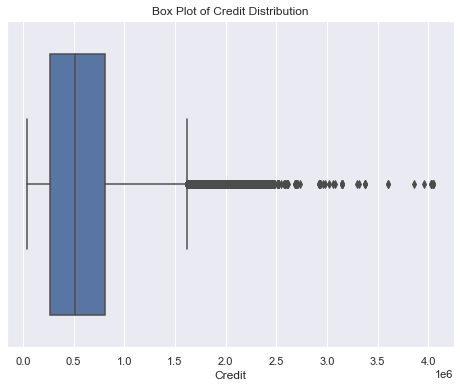

In [78]:
# Ploting box plot for AMT_CREDIT
sns.set(style="darkgrid")  

# Create a box plot for 'AMT_CREDIT
plt.figure(figsize=(8, 6))  
sns.boxplot(data = dropped, x= dropped['AMT_CREDIT'])

# Add labels and title (optional)
plt.xlabel('Credit')
plt.title('Box Plot of Credit Distribution')

# Show the plot
plt.show()

**Insights/Observations**

We observe that an individual has annuity to be 250K which is definetly an outlier

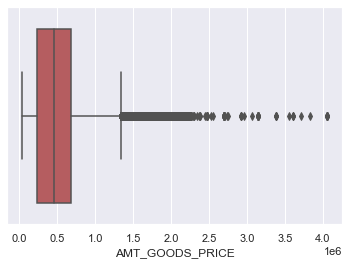

In [83]:
# Ploting box plot for AMT_GOODS_PRICE
sns.boxplot(data= dropped, x= dropped['AMT_GOODS_PRICE'], color = 'r')
plt.show()

**Insights/Observations**

There are outliers in the data but none of them look strange enough to raise flags

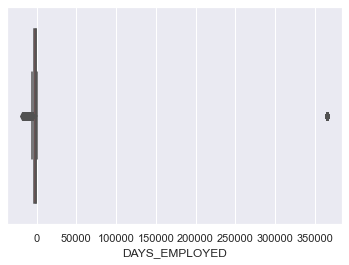

In [82]:
# Ploting box plot for DAYS_EMPLOYED
sns.boxplot(data= dropped, x= dropped['DAYS_EMPLOYED'], color = 'r')
plt.show()

**Insights/Observations**

The max observation of 365K days is definelty an outlier because if converted in years it turns out to be ~1000 years which is absurd 

### Step 5 Checking Data Imbalance

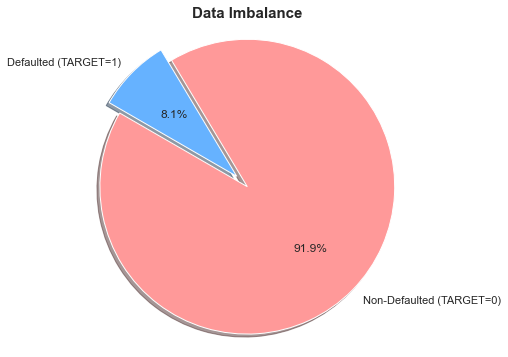

In [106]:
import matplotlib.pyplot as plt

# Calculating the percentages
target_counts = dropped['TARGET'].value_counts(normalize=True) * 100

# Creating labels
labels = ['Non-Defaulted (TARGET=0)', 'Defaulted (TARGET=1)']
custom_colors = ['#FF9999', '#66B2FF']

# Plot the pie chart with custom colors
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=150, explode=(0.1, 0), shadow=True, colors=custom_colors)
plt.title('Data Imbalance',fontweight = 'bold', fontsize=15)
plt.axis('scaled')  # Scaled/ Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [90]:
target_counts

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

**Write Down the Insights/Observation with respect to above figure**



Ans: The above pie chart depicts that the majority of target belongs to non-defaulted class at **91.9%** while only **8.1%** is defaulted

In [107]:
# Spliting the applications data set in two parts - defaulters & non defaulters
app_def = dropped[dropped.TARGET==1]
app_nondef = dropped[dropped.TARGET==0]

# Checking the shape of each portion
print(app_def.shape)
print(app_nondef.shape)

(24825, 67)
(282686, 67)


In [108]:
app_def.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_D

### Step 6 Univariate Analysis

In [110]:
# function to plot percentage counts for categorical variables
def plot_var_percent(var):
    plt.figure(figsize=(15, 5))

    for i, df, title in zip([1, 2], [app_nondef, app_def], ['Non-Defaulters', 'Defaulters']):
        plt.subplot(1, 2, i)
        app_percent = df[var].value_counts(normalize=True).rename('percentage').mul(100)
        app_percent.plot.bar()
        plt.title(f'Percent of {var} for {title}', fontsize=14)
        plt.xlabel(var)
        plt.xticks(rotation=90)
        plt.ylabel(f'% {title.lower()}')
    
    plt.tight_layout()
    plt.show()


In [111]:
# function to plot counts for categorical variables

def pltcounts(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=app_nondef)
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=app_def)
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

**Step 6.1 Categorical unordered univariate analysis**

In [ ]:
app_nondef_percent = app_nondef.NAME_CONTRACT_TYPE.value_counts(normalize=True).rename('percentage').mul(100)
app_nondef_percent


#x = 'NAME_CONTRACT_TYPE'
#g = sns.catplot(x=x,y='percentage',kind='bar',data=app_nondef_percent)
#g.ax.set_ylim(0,100)


In [ ]:
# Plotting the percent of the type of loan. Column name: NAME_CONTRACT_TYPE


**Write your Insights/Observation**



In [ ]:
# Plotting the percent of gender, column name: CODE_GENDER



**Write your Insights/Observation**



In [ ]:
# Plotting based on income type
pltfunction('NAME_INCOME_TYPE')

** Write your Insights/Observation**



In [ ]:
# Plotting the family status. column name: NAME_FAMILY_STATUS
pltfunction('NAME_FAMILY_STATUS')

**Write your Insights/Observation**


In [ ]:
# Plotting based on Housing Type
pltfunction('NAME_HOUSING_TYPE')

**Insights/Observation**
The applicants living with parents have higher default rate and one plausible reason could be that the applicants might not be having sufficient savings to rent or own a house. Thus we can infer that they have higher chance of not able to save for the loan repayments

**Step 6.3 Numerical univariate analysis**

In [ ]:
# defining function for plotting contnous variables
def pltcont(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    app_nondef[var].plot.hist()
    plt.title('Distribution for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    
    plt.subplot(1, 2, 2)
    app_def[var].plot.hist()
    plt.title('Distribution for Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.show()

In [ ]:
# Plotting to check the range of loan annuity on the basis of 
pltcont('AMT_ANNUITY')

**Write down your Insights/Observation**



In [ ]:
# Plotting to check the range of good's price
pltcont('AMT_GOODS_PRICE')

**Write down your Insights/Observation**



### Step 7 Bivariate Analysis 

**Step 7.1 Numerical -  Numerical analysis**

In [ ]:
app_def.columns

In [ ]:
# Plotting pair plot between the numerical variables for non defaulters

pair = app_nondef[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()


In [ ]:
# Heatmap for Loan- Non Payment Difficulties
sns.heatmap(app_nondef[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','DAYS_EMPLOYED']].corr(),annot=True,cmap='Reds')
plt.show()

In [ ]:
# Plotting pair plot between the numerical variables for defaulters
pair = app_def[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()


In [ ]:
# Heatmap for Loan- Non Payment Difficulties
sns.heatmap(app_def[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','DAYS_EMPLOYED']].corr(),annot=True,cmap='Blues')
plt.show()

**Write down your Insights/Observation**




In [ ]:
# Checking the co-relation for defaulters & non defaulters between credit & annuity
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_ANNUITY',data=app_nondef)
plt.title('CREDIT vs ANNUITY for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_ANNUITY',data=app_def)
plt.title('CREDIT vs ANNUITY for Defaulters')
plt.show()


**Insight/Observation**

Above 2M credit & greater than 80K annuity the default rate reduces. 

In [ ]:
# Checking the co-relation for defaulters & non defaulters between credit & good's price
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=app_nondef)
plt.title('CREDIT vs GOODS PRICE for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=app_def)
plt.title('CREDIT vs GOODSPRICE for Defaulters')
plt.show()


**Write down your Insight/Observation**



**Top 10 co-relation for clients with payment difficulties**

In [ ]:
# Unstacking the correlation matrix 
corr=app_nondef[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','DAYS_EMPLOYED']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

# Listing down the correlation matrix
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()

# Obtaining the top 10 correlation
corr_df.sort_values('CORR_ABS', ascending=False).head(10)


**Step 7.2 Categorical -  Numerical analysis**

In [ ]:
app_def.columns

In [ ]:
# Checking the mean of income for males & females non defaulters v.s defaulters

plt.figure(figsize=(9,2))
sns.catplot(data=app_nondef,x='CODE_GENDER',y='AMT_INCOME_TOTAL',kind='bar',estimator=np.mean)
plt.show()

In [ ]:
plt.figure(figsize=(9,2))
sns.catplot(data=app_def,x='CODE_GENDER',y='AMT_INCOME_TOTAL',kind='bar',estimator=np.mean)
plt.show()

**Write down your Insights/Observations**

